In [104]:
#First we import the necessary libraries.
#pywt is a wavelet transformation library which I found is easier to apply than manually coding functions up.
from __future__ import print_function
import pywt
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [106]:
df1 = pd.read_csv('/Users/andyliu/develop/andy/aapl_indicators_nosplit.csv')
df2 = df1.iloc[:,1:]
df3 = df2.drop(labels=['roc', 'mtm6', 'mtm12'], axis=1)
df1 = df3
df1.head()

date    open   close     low    high  volume    bb_bbm    bb_bbh  \
0   2/8/00  4.0714  4.1027  3.9755  4.1451       0  3.742555  4.258224   
1   2/9/00  4.0804  4.0224  4.0179  4.1786       0  3.778050  4.267487   
2  2/10/00  4.0224  4.0536  3.9130  4.0670       0  3.825040  4.222099   
3  2/11/00  4.0581  3.8840  3.8706  4.0759       0  3.846470  4.205897   
4  2/14/00  3.9018  4.1362  3.8840  4.1384       0  3.873925  4.233795   

     bb_bbl       atr      macd         cci       ema     sma12     sma5  \
0  3.226886  0.258809  0.028209  108.782044  3.824942  3.819608  3.85050   
1  3.288613  0.251801  0.041007   99.551288  3.851270  3.838583  3.94916   
2  3.427981  0.244815  0.053055   72.677158  3.878247  3.842308  4.02192   
3  3.487043  0.241993  0.048361   40.605138  3.879014  3.838033  4.02728   
4  3.514055  0.242879  0.064250   80.649750  3.913306  3.855333  4.03978   

   stochastic_oscillator  
0              75.940406  
1              80.342311  
2              84.268815  
3              62.924742  
4              94.663982

In [107]:
df1[list(df1.columns)] = df1[list(df1.columns)].apply(pd.to_numeric, errors='ignore')

In [108]:
df3 = df1[['open', 'high', 'low', 'close']]

In [109]:
a = df3.close.values

In [110]:
b = df3.values

In [112]:
df1 = df1.drop(['date'], axis=1)
df1.columns

Index(['open', 'close', 'low', 'high', 'volume', 'bb_bbm', 'bb_bbh', 'bb_bbl',
       'atr', 'macd', 'cci', 'ema', 'sma12', 'sma5', 'stochastic_oscillator'],
      dtype='object')

In [26]:
#df2=df2.drop(df2.index[-1])
#df1[['open','high','low','close']]=df2[['open','high','low','close']]

In [113]:
df1=df1.interpolate(method='akima')
df1.replace(np.inf, np.nan)
df1=df1.dropna(subset=['open', 'high', 'low', 'close'])

In [115]:
#df1 = df1.drop(['date'], axis=1)
close = df1['close']
#df1 = df1.drop(['close'], axis=1)
df1.columns

Index(['open', 'close', 'low', 'high', 'volume', 'bb_bbm', 'bb_bbh', 'bb_bbl',
       'atr', 'macd', 'cci', 'ema', 'sma12', 'sma5', 'stochastic_oscillator'],
      dtype='object')

In [197]:
g = df1.values
r = g.shape[0]
n_train = r//2
n1_train = 9*r//10
print(n_train, n1_train, r)
#train_indices = random.sample(range(r), n_train)
#test_indices = [i for i in list(range(r)) if i not in train_indices]
#train_indices.sort()
#test_indices.sort()

2545 4581 5090


In [263]:
price_cols = ['open', 'high', 'low', 'close']
price_data = df1[price_cols]
#data = df1.drop('close', axis=1)
#data = df1.drop('date', axis=1)
#exp_X_train=g[train_indices,:]
#exp_X_test=g[test_indices,:]
exp_X_train = g[n_train:n1_train,:]
exp_X_test = g[n1_train:,:]
#h = price.values
exp_X_train.shape

(2036, 15)

In [264]:
price_train = price_data[n_train:n1_train]
price_test = price_data[n1_train:]

In [265]:
price_train

open      high       low     close
2545   34.2329   34.5500   34.1086   34.3457
2546   34.2014   34.4586   34.0257   34.2957
2547   34.4143   34.6586   34.3614   34.5857
2548   34.6514   34.7243   34.5500   34.6386
2549   34.5429   34.7557   34.4286   34.7500
2550   34.8514   35.1757   34.7429   35.1286
2551   34.9800   35.5700   34.9571   35.4143
2552   35.4557   35.8557   34.9743   35.3414
2553   35.2271   35.4014   34.5691   35.1143
2554   35.5286   37.7657   34.7214   35.0629
2555   36.7300   37.2429   36.5714   36.9429
2556   37.0757   38.0957   36.6329   38.0286
2557   38.1057   38.8571   38.0486   38.7100
2558   38.8571   38.9714   38.3150   38.4514
2559   38.3229   38.3229   37.2857   37.4371
2560   36.7443   37.7686   36.4457   37.2143
2561   37.4714   38.5643   37.4029   38.3000
2562   38.5000   38.6543   37.2871   37.3457
2563   37.4814   38.2557   37.2986   37.9643
2564   38.0071   38.0071   36.7214   36.8686
2565   36.6714   36.8756   35.6357   36.5786
2566   36.4514   37.1429   30.0957   34.5714
2567   34.6857   35.3886   32.2071   33.6100
2568   36.4286   36.5714   35.2500   36.3086
2569   36.2143   37.1140   35.7171   36.4657
2570   36.6457   37.5643   36.6071   37.4571
2571   37.2943   37.8494   36.6643   37.0000
2572   36.7429   36.7429   35.7171   35.9929
2573   36.1414   36.5743   35.4329   36.3271
2574   36.5171   36.9157   35.6714   35.7143
...        ...       ...       ...       ...
4551  165.5000  166.3000  161.4100  163.0800
4552  163.1000  165.3900  161.9000  164.9900
4553  164.5000  165.6600  163.4100  164.8300
4554  164.8000  165.1599  160.7099  162.1700
4555  162.7000  167.1730  161.9200  166.1500
4556  166.2000  177.5200  165.5300  175.2900
4557  174.7000  177.6960  173.7100  176.5000
4558  176.2500  177.4334  174.4900  177.0000
4559  177.5000  188.0581  177.4700  188.0581
4560  184.4500  187.6200  184.2500  184.9500
4561  185.1600  186.1900  183.7700  186.0000
4562  186.4000  187.5000  185.2700  187.4800
4563  187.4400  190.2600  187.2000  189.8500
4564  189.6000  190.0274  187.5400  188.5500
4565  189.0200  189.5100  187.8200  187.8200
4566  187.4400  187.6800  185.1410  185.8000
4567  186.1600  188.3900  185.5000  188.1500
4568  187.7500  188.8800  186.3900  186.9500
4569  187.1900  187.7500  186.2000  186.4100
4570  187.2100  189.2400  186.9500  187.5900
4571  187.9200  188.7400  186.8200  187.2500
4572  185.9900  188.8100  184.6500  188.6500
4573  188.7000  189.0000  186.3600  188.5000
4574  188.7800  189.6500  187.7092  188.7300
4575  187.9400  188.6300  186.7000  187.7000
4576  188.5000  188.6200  186.8100  187.1700
4577  187.9000  188.1610  186.2800  186.9700
4578  187.5300  190.5000  187.4000  190.4900
4579  191.0000  193.3500  190.8000  192.3500
4580  192.2100  193.9200  192.2100  193.3000

[2036 rows x 4 columns]

In [266]:
#exp_y_train=h[train_indices]
#exp_y_test=h[test_indices]
print(exp_X_train.shape, exp_X_test.shape)
#print(price_train.shape, price_test.shape)

(2036, 15) (509, 15)


In [267]:
coeffs= pywt.wavedec2(price_train, 'haar',  mode='symmetric',level=2)
coeffs[-1] = tuple([np.zeros_like(v) for v in coeffs[-1]])
c=pywt.waverec2(coeffs,'haar')
coeffs1=pywt.wavedec2(c,'haar', mode='symmetric', level=2)
coeffs1[-1] = tuple([np.zeros_like(v) for v in coeffs1[-1]])
d=pywt.waverec2(coeffs1, 'haar')
exp_X_train[:,0] = d[:,0]
exp_X_train[:,1] = d[:,1]
exp_X_train[:,2] = d[:,2]
exp_X_train[:,3] = d[:,3]

In [268]:
from sklearn import preprocessing

In [269]:
exp_X_train[:,1]

array([ 34.360725,  34.360725,  34.61215 , ..., 188.52275 , 192.62    ,
       192.62    ])

In [270]:
scaler= preprocessing.MinMaxScaler()
scaler.fit(exp_X_train)
exp_X_train=scaler.transform(exp_X_train)
scaled_df1=pd.DataFrame(exp_X_train)
scaled_df1.head()

0         1         2         3    4         5         6         7   \
0  0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.307548   
1  0.000000  0.000000  0.000000  0.000000  0.0  0.000713  0.000814  0.307647   
2  0.001589  0.001589  0.002152  0.002152  0.0  0.001487  0.001760  0.307684   
3  0.001589  0.001589  0.002152  0.002152  0.0  0.002206  0.002637  0.307723   
4  0.002974  0.002974  0.003599  0.003599  0.0  0.003141  0.003348  0.308245   

         8         9         10        11        12        13        14  
0  0.000706  0.681400  0.730498  0.000000  0.000000  0.000000  0.933975  
1  0.000589  0.681347  0.693755  0.000930  0.001175  0.000870  0.917817  
2  0.000444  0.681654  0.700272  0.001984  0.002242  0.001987  0.977239  
3  0.000208  0.681671  0.689866  0.002944  0.003243  0.002651  0.968293  
4  0.000071  0.681601  0.676055  0.003871  0.004488  0.003314  0.997625

In [271]:
price_train = d[:,1]
len(price_train)

2036

In [272]:
#Importing the keras library to start constructing the LSTM network
from keras.models import Model, load_model, Sequential
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from keras import backend as K
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred-y_true),axis=-1))

In [273]:
import random

In [274]:
price_train = exp_X_train[:,1]
exp_X_train = np.delete(exp_X_train, 1, axis=1)
exp_X_train.shape

(2036, 14)

In [275]:
X_train= exp_X_train.reshape((exp_X_train.shape[0],1,exp_X_train.shape[1]))
#X_test=exp_X_test.reshape((exp_X_test.shape[0],1,exp_X_test.shape[1]))
y_train=price_train
#y_test=exp_y_test
#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X_train.shape, y_train.shape)

(2036, 1, 14) (2036,)


In [276]:
y_train

array([0.        , 0.        , 0.00158869, ..., 0.97411052, 1.        ,
       1.        ])

In [277]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

In [253]:
neurons=60
dropout=0.20
model1 = Sequential()
model1.add(LSTM(neurons, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), activation='sigmoid'))
model1.add(Dropout(dropout))
model1.add(LSTM(neurons*2, return_sequences=True, activation='sigmoid'))
model1.add(Dropout(dropout))
model1.add(LSTM(neurons*4, return_sequences=True, activation='sigmoid'))
model1.add(Dropout(dropout))
model1.add(LSTM(neurons, activation='sigmoid'))
model1.add(Dense(units=1))
model1.add(Activation('sigmoid'))
model1.compile(loss='mse', optimizer='adam')
model1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_17 (LSTM)               (None, 1, 60)             18000     
_________________________________________________________________
dropout_13 (Dropout)         (None, 1, 60)             0         
_________________________________________________________________
lstm_18 (LSTM)               (None, 1, 120)            86880     
_________________________________________________________________
dropout_14 (Dropout)         (None, 1, 120)            0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 1, 240)            346560    
_________________________________________________________________
dropout_15 (Dropout)         (None, 1, 240)            0         
_________________________________________________________________
lstm_20 (LSTM)               (None, 60)               

In [ ]:
history=model1.fit(X_train,y_train, epochs=5000, shuffle=False,batch_size=64, verbose=1)
model1.save('./models/attempt2.h5')
plt.plot(history.history['loss'], label='train')
#plt.plot(history.history['rmse'], label='test')
plt.legend()
plt.show()

Epoch 1/5000
2036/2036 [==============================] - 0s 236us/step - loss: 0.4445
Epoch 2/5000
2036/2036 [==============================] - 0s 227us/step - loss: 0.4445
Epoch 3/5000
2036/2036 [==============================] - 0s 236us/step - loss: 0.4445
Epoch 4/5000
2036/2036 [==============================] - 1s 253us/step - loss: 0.4445
Epoch 5/5000
2036/2036 [==============================] - 1s 336us/step - loss: 0.4445
Epoch 6/5000
2036/2036 [==============================] - 0s 231us/step - loss: 0.4445
Epoch 7/5000
2036/2036 [==============================] - 0s 238us/step - loss: 0.4445
Epoch 8/5000
2036/2036 [==============================] - 0s 232us/step - loss: 0.4445
Epoch 9/5000
2036/2036 [==============================] - 0s 240us/step - loss: 0.4445
Epoch 10/5000
2036/2036 [==============================] - 1s 251us/step - loss: 0.4445
Epoch 11/5000
2036/2036 [==============================] - 0s 229us/step - loss: 0.4445
Epoch 12/5000
2036/2036 [================

1088/2036 [===============>..............] - ETA: 0s - loss: 0.6637

In [228]:
coeffs= pywt.wavedec2(price_test, 'haar',  mode='symmetric',level=2)
coeffs[-1] = tuple([np.zeros_like(v) for v in coeffs[-1]])
c=pywt.waverec2(coeffs,'haar')
coeffs1=pywt.wavedec2(c,'haar', mode='symmetric', level=2)
coeffs1[-1] = tuple([np.zeros_like(v) for v in coeffs1[-1]])
d=pywt.waverec2(coeffs1, 'haar')
exp_X_test[:,0] = d[:-1,0]
exp_X_test[:,1] = d[:-1,1]
exp_X_test[:,2] = d[:1,2]
exp_X_test[:,3] = d[:-1,3]

In [229]:
exp_X_test=scaler.transform(exp_X_test)
#exp_X_test=scaler.fit_transform(exp_X_test)
scaled_df1=pd.DataFrame(exp_X_test)
scaled_df1.head()

0         1    2         3    4         5         6         7   \
0  0.229642  0.229642  0.0  0.246467  0.0  0.212028  0.175164  0.262385   
1  0.229642  0.229642  0.0  0.246467  0.0  0.213670  0.178681  0.261858   
2  0.216077  0.216077  0.0  0.234338  0.0  0.214293  0.180176  0.261483   
3  0.216077  0.216077  0.0  0.234338  0.0  0.215018  0.181211  0.261820   
4  0.220899  0.220899  0.0  0.238047  0.0  0.216376  0.183315  0.262271   

         8         9         10        11        12        13        14  
0  0.016663  0.728412  0.826158  0.203232  0.215146  0.228363  0.970464  
1  0.012796  0.728362  0.754516  0.206201  0.217720  0.234730  0.866327  
2  0.020926  0.723947  0.579582  0.207917  0.219924  0.236289  0.750000  
3  0.015203  0.716659  0.582195  0.208689  0.221037  0.234947  0.653061  
4  0.009286  0.713512  0.614151  0.210449  0.222892  0.234122  0.801020

In [230]:
y_test = exp_X_test[:,1]
exp_X_test = np.delete(exp_X_test, 1, axis=1)
X_test=exp_X_test.reshape((exp_X_test.shape[0],1,exp_X_test.shape[1]))

In [231]:
pred=model1.predict(X_test)
actual= pd.DataFrame(y_test)

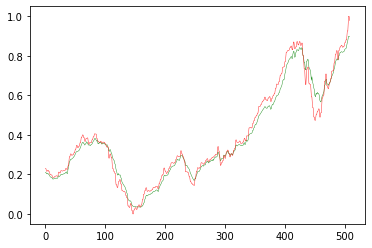

In [232]:
plt.plot(pred, color='green',linewidth=0.4)
plt.plot(actual, color='red', linewidth=0.4)
plt.savefig('./sae_prediction.png')
plt.show()

In [165]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [233]:
import math
mse = mean_squared_error(actual, pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(actual, pred)
#mape = mean_absolute_percentage_error(actual, pred)
print("mse, rmse, mae:" + str((mse,rmse,mae)))

mse, rmse, mae:(0.001287474686653091, 0.03588139750139466, 0.027988156828800452)


In [234]:
def mean_absolute_percentage_error(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return(mape)